In [116]:
import pandas as pd
import numpy as np
import seaborn as sbs
from pandas import factorize
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [117]:
df=pd.read_csv("Cereals.csv")

In [118]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7,5,320,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8,0,330,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14,8,?,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13,12,25,25,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3,1,230,3.0,17,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17,3,110,25,1,1.0,1.00,51.592193


In [119]:
#Q1. Create a table with the 5-number summary of all the nutrient

df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].describe()

,protein,fat,sodium,fiber,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,2.048684,28.289474
std,1.089020,1.013159,84.318813,2.219038,22.487813
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,132.500000,0.750000,25.000000
50%,2.500000,1.000000,180.000000,1.750000,25.000000
75%,3.000000,2.000000,212.500000,3.000000,25.000000
max,6.000000,5.000000,320.000000,14.000000,100.000000


In [120]:
#Q2. For each of the numeric attributes (proteins upto vitamins), identify and replace all missing  
#    data(indicated with ?) with the arithmetic mean of the attribute.

df=df.mask(df=='?',np.nan)

prot= pd.to_numeric(df.protein,errors='coerce')
df.protein= prot.fillna(prot.mean())

fat= pd.to_numeric(df.fat,errors='coerce')
df.fat= fat.fillna(fat.mean())

sod= pd.to_numeric(df.sodium,errors='coerce')
df.sodium= sod.fillna(sod.mean())

fib= pd.to_numeric(df.fiber,errors='coerce')
df.fiber= fib.fillna(fib.mean())

carb= pd.to_numeric(df.carbo,errors='coerce')
df.carbo= carb.fillna(carb.mean())

sug= pd.to_numeric(df.sugars,errors='coerce')
df.sugars= sug.fillna(sug.mean())

pot= pd.to_numeric(df.potass,errors='coerce')
df.potass= pot.fillna(pot.mean())

vit= pd.to_numeric(df.vitamins,errors='coerce')
df.vitamins= vit.fillna(vit.mean())

df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3,5,15,2.0,8.0,8.0,135.000000,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.000000,25,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4,0,140,14.0,8.0,0.0,330.000000,25,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2,2,200,1.0,14.0,8.0,96.216216,25,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3,1,230,3.0,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [121]:
#Q3. Create a table with the 5-number summary of all the numeric attributes after treating 
#    missing values. Do you think the strategy used in dealing with missing values was effective?

df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].describe()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,2.526316,1.013158,160.065789,2.048684,14.933333,7.040000,96.216216,28.289474
std,1.089020,1.013159,84.318813,2.219038,3.737498,4.377031,66.687384,22.487813
min,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000
25%,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000
50%,2.500000,1.000000,180.000000,1.750000,14.966667,7.000000,90.000000,25.000000
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000
max,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000


In [122]:
#Q4. For each of the numeric attributes (proteins upto vitamins), identify and replace all noisy 
#    data with the median of attribute

Q1=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(0.25)
Q3=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(0.75)
Md=df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].quantile(0.5)

IQR=Q3-Q1
LB=Q1-(1.5*IQR)
UB=Q3+(1.5*IQR)

i=0
for column in d[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]]:
  df[column]=np.where(df[column]>UB[i], Md[i],df[column])
  df[column]=np.where(df[column]<LB[i], Md[i],df[column])
  i=i+1

df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100NaturalBran,Q,C,120,3.0,5.0,15.0,2.00,8.0,8.0,135.000000,25.0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4.0,1.0,260.0,1.75,7.0,5.0,90.000000,25.0,3,1.0,0.33,59.425505
2,All-BranwithExtraFiber,K,C,50,4.0,0.0,140.0,1.75,8.0,0.0,90.000000,25.0,3,1.0,0.50,93.704912
3,AlmondDelight,R,C,110,2.0,2.0,200.0,1.00,14.0,8.0,96.216216,25.0,3,1.0,0.75,34.384843
4,AppleCinnamonCheerios,G,C,110,2.0,2.0,180.0,1.50,10.5,10.0,70.000000,25.0,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1.0,250.0,0.00,21.0,3.0,60.000000,25.0,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1.0,140.0,0.00,13.0,12.0,25.000000,25.0,2,1.0,1.00,27.753301
73,WheatChex,R,C,100,3.0,1.0,230.0,3.00,17.0,3.0,115.000000,25.0,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1.0,200.0,3.00,17.0,3.0,110.000000,25.0,1,1.0,1.00,51.592193


In [123]:
#Q5. Create a table with the 5-number summary of all the numeric attributes after treating noisy 
#    values. Do you think the strategy used in dealing with noisy values was effective?

df[["protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].describe()

,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,2.401316,1.013158,181.381579,1.792105,14.933333,7.040000,85.821479,25.0
std,0.875670,1.013159,60.186370,1.520220,3.737498,4.377031,48.062504,0.0
min,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0
25%,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0
50%,2.250000,1.000000,180.000000,1.625000,14.966667,7.000000,90.000000,25.0
75%,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0
max,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0


In [124]:
#Q6. Cross tabulate the type of cereal (hot vs cold) against the manufacturer

pd.crosstab(df.type,df.mfr)

mfr,A,G,K,N,P,Q,R
type,,,,,,,
C,0,22,23,4,9,7,8
H,1,0,0,1,0,1,0


In [125]:
#Q7. Which is the cereal with the best rating, worst rating?

best_rating=df.rating.max()
best_cereal=df.loc[d.rating==best_rating,"name"]

worst_rating=df.rating.min()
worst_cereal=df.loc[d.rating==worst_rating,"name"]

print("Best cereal :",best_cereal)
print("Worst cereal :",worst_cereal)

Best cereal : 2    All-BranwithExtraFiber
Name: name, dtype: object
Worst cereal : 9    CapnCrunch
Name: name, dtype: object


/Users/ashrutarora/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='rating'>

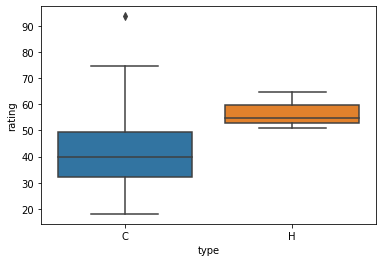

In [126]:
#Q8. Plot a side-by-side boxplot comparing the consumer rating of hot vs. cold cereals.

sbs.boxplot(df.type,df.rating)

In [127]:
#Q9. Is there a relation between sugars, calories, carbs, and fat?

df[["sugars","calories","carbo","fat"]].corr()

,sugars,calories,carbo,fat
sugars,1.000000,0.574182,-0.501086,0.300664
calories,0.574182,1.000000,0.207331,0.510630
carbo,-0.501086,0.207331,1.000000,-0.311619
fat,0.300664,0.510630,-0.311619,1.000000


In [128]:
#Q10. Which manufacturers produce cereal with highest calories?

df.loc[df["calories"]==df["calories"].max(),"mfr"]

45    K
Name: mfr, dtype: object

In [129]:
#Q11. Use correlation tests and visualization to identify if the two variables calories and 
#     consumer rating associated?

df["calories"].corr(df["rating"])

-0.6743360496799726

/Users/ashrutarora/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calories', ylabel='rating'>

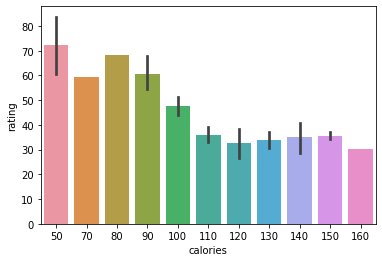

In [130]:
sbs.barplot(df.calories,df.rating)

In [131]:
#Q12. Use correlation tests and visualization to identify if the two variables shelf and calories associated?

df["calories"].corr(df["shelf"])

0.12500858527753547

/Users/ashrutarora/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calories', ylabel='shelf'>

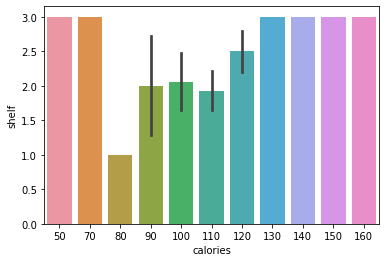

In [132]:
sbs.barplot(df.calories,df.shelf)

In [133]:
#Q13. Is there a relation between manufacturer and rating?

pd.crosstab(df.rating,df.mfr)

mfr,A,G,K,N,P,Q,R
rating,,,,,,,
18.042851,0,0,0,0,0,1,0
19.823573,0,1,0,0,0,0,0
21.871292,0,0,0,0,0,1,0
22.396513,0,1,0,0,0,0,0
22.736446,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
64.533816,0,0,0,1,0,0,0
68.235885,0,0,0,1,0,0,0
72.801787,0,0,0,1,0,0,0


/Users/ashrutarora/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mfr', ylabel='rating'>

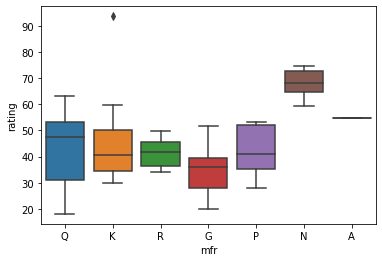

In [134]:
sbs.boxplot(df.mfr,df.rating)

In [135]:
labels, categories = factorize(df["name"])
df["labels"] = labels
print('Correlation between manufacturer and rating:')
abs(df["rating"].corr(df["labels"]))

Correlation between manufacturer and rating:


0.15060300914810562

In [136]:
#Q14. Which nutrients are essential for a good rating for a cereal?

df[["rating","protein","fat","sodium","fiber","carbo","sugars","potass","vitamins"]].corr()

,rating,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
rating,1.000000,0.466606,-0.418439,-0.050622,0.335319,0.160944,-0.774195,0.210422,NaN
protein,0.466606,1.000000,0.226913,-0.120710,0.587843,-0.016296,-0.226812,0.671202,NaN
fat,-0.418439,0.226913,1.000000,-0.248478,0.135546,-0.311619,0.300664,0.357102,NaN
sodium,-0.050622,-0.120710,-0.248478,1.000000,-0.124328,0.444669,-0.288453,-0.158369,NaN
fiber,0.335319,0.587843,0.135546,-0.124328,1.000000,-0.109941,-0.000180,0.791170,NaN
carbo,0.160944,-0.016296,-0.311619,0.444669,-0.109941,1.000000,-0.501086,-0.093629,NaN
sugars,-0.774195,-0.226812,0.300664,-0.288453,-0.000180,-0.501086,1.000000,0.029548,NaN
potass,0.210422,0.671202,0.357102,-0.158369,0.791170,-0.093629,0.029548,1.000000,NaN
vitamins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
